In [1]:
from __future__ import division
from __future__ import print_function
from sklearn.ensemble import IsolationForest

import os
import sys
from time import time

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

import numpy as np
from numpy import percentile
from sklearn.metrics import average_precision_score
import scipy.io
import matplotlib.pyplot as plt

In [2]:
# Define the number of inliers and outliers
n_samples = 256
outliers_fraction = 0.25
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

In [3]:
random_state = np.random.RandomState(42)
# Define nine outlier detection tools to be compared
classifiers = {
    'Isolation Forest': IsolationForest(n_estimators= 100, 
                                random_state=random_state, max_samples=256, bootstrap = False)
}

C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_iforest.py:289: UserWarning: max_samples (256) is greater than the total number of samples (214). max_samples will be set to n_samples for estimation.
  warn(


{'whiskers': [<matplotlib.lines.Line2D at 0x24de4484220>,
 'caps': [<matplotlib.lines.Line2D at 0x24de4484850>,
 'boxes': [<matplotlib.lines.Line2D at 0x24de246ef10>],
 'medians': [<matplotlib.lines.Line2D at 0x24de4484d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x24de4495070>],
 'means': []}

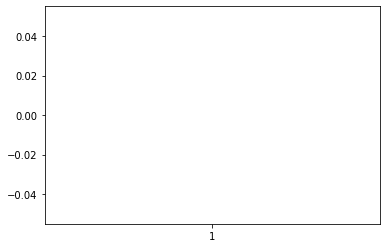

In [4]:
# Fit the models with the generated data and 
# compare model performances
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    #X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    #X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    #X = np.r_[X1, X2]
    # Add outliers
    #X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]
    data = scipy.io.loadmat('C:\\Users\\anton\\OneDrive\\Skrivbord\\Thesis_Code\\IsolationForestTinyML\\DatSets\\glass.mat',
                        squeeze_me=False)

    enlist = list(data.items())
    X = np.array(enlist, dtype=object)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 1)
    y_true = np.empty([1,0], dtype=int)

    #print(X[1][0][0])
    k = 0
    while k < len(X[1][0]):
        y_true = np.append(y_true, int(X[1][0][k]))
        k += 1

    X = X[0][0]
    
   
    # Fit the model
    #plt.figure(figsize=(15, 12))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        #print(i + 1, 'fitting', clf_name)
        # fit the data and tag outliers
        p = 0
        aps = []
        #while p < 10:
        clf.fit(X)
        #WARNING put +1
        scores_pred = clf.decision_function(X) * 1 
        #threshold = percentile(scores_pred, 100 * outliers_fraction)
        #y_pred = clf.predict(A) * -1
        #y_pred = (y_pred + 1) / 2
        #aps.append(average_precision_score(y_true, scores_pred))
        #p += 1
        #n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points
        #WARNING +1
        #Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * 1
        #Z = Z.reshape(xx.shape)
        #plt.figure(figsize=[10,10])
        #subplot = plt.subplot(2, 2, 1)
        #subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
        #                 cmap=plt.cm.Blues_r)
        #a = subplot.contour(xx, yy, Z, levels=[-threshold],
        #                    linewidths=2, colors='red')
        #subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
        #                 colors='orange')
        #b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
        #                    s=20, edgecolor='k')
        #c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
        #                    s=20, edgecolor='k')
        #subplot.axis('tight')
        #subplot.legend(
         #   [a.collections[0], b, c],
        #    ['learned decision function', 'true inliers', 'true outliers'],
          #  prop=matplotlib.font_manager.FontProperties(size=10),
          #  loc='lower right')
        #subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        #subplot.set_xlim((-7, 7))
        #subplot.set_ylim((-7, 7))
    #plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    #plt.suptitle("Outlier detection")
#plt.show()
plt.boxplot(aps)

In [5]:
file = open("save_vectors.ino", "w")

file.write("#include <vector>\n")
file.write("using namespace std;\n\n")
file.write("struct Tree{\n")
file.write("    int child_id_left, child_id_right, feature, n_samples;\n")
file.write("    float threshold;\n")
file.write("};\n\n")

file.write("vector<vector<Tree>> iForest;\n")
m = 0
while m < clf.n_estimators:
    file.write("std::vector<Tree> iTree" + str(m + 1) + ";\n")
    m += 1
file.write("\n")

f = 0
file.write("void setup() {\n")
file.write("    Serial.begin(9600);\n")
while f < clf.n_estimators:
    j = 0
    while j < len(clf.estimators_[f].tree_.feature):
        temp_child_l = clf.estimators_[f].tree_.children_left[j]
        if clf.estimators_[f].tree_.children_left[j] == -1:
            temp_child_l = 0

        temp_child_r = clf.estimators_[f].tree_.children_right[j]
        if temp_child_r == clf.estimators_[f].tree_.children_right[j] == -1:
            temp_child_r = 0

        temp_feature = clf.estimators_[f].tree_.feature[j]
        temp_threshold = clf.estimators_[f].tree_.threshold[j]
        temps_values = clf.estimators_[f].tree_.n_node_samples[j]

        file.write("    iTree" + str(f + 1) + ".push_back({"  
                                                            + str(temp_child_l) + ", "
                                                            + str(temp_child_r) + ", "
                                                            + str(temp_feature) + ", "
                                                            + str(temps_values) + ", "
                                                            + str(temp_threshold) + 
                                                        "});\n")

        j += 1

    file.write("    iForest.push_back(iTree" + str(f + 1) + ");\n\n")
    f += 1

rows = f*j
memory_per_vector = 8
allocated_memory = rows * memory_per_vector
file.write("}\n")
file.write("void loop() {\n")
file.write("\n}")




2

In [70]:
# Fit the models with the generated data and 
# compare model performances
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    #X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    #X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    #X = np.r_[X1, X2]
    # Add outliers
    #X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]
    data = scipy.io.loadmat('C:\\Users\\anton\\OneDrive\\Skrivbord\\Thesis_Code\\IsolationForestTinyML\\DatSets\\mnist.mat',
                        squeeze_me=False)

    enlist = list(data.items())
    X = np.array(enlist, dtype=object)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 1)

    y_true = np.empty([1,0], dtype=int)

    #print(X[1][0][0])
    k = 0
    while k < len(X[1][0]):
        y_true = np.append(y_true, int(X[1][0][k]))
        k += 1

    X = X[0][0]
    # Fit the model
    #plt.figure(figsize=(15, 12))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        #print(i + 1, 'fitting', clf_name)
        # fit the data and tag outliers
        p = 0
        aps = []
        all_scores = []
        while p < 10:
            clf.fit(X)
            #WARNING put +1
            scores_pred = clf.decision_function(X) * 1 
            #threshold = percentile(scores_pred, 100 * outliers_fraction)
            #y_pred = clf.predict(X) * -1
            #y_pred = (y_pred + 1) / 2
            #aps.append(average_precision_score(y_true, scores_pred))
            all_scores.append(scores_pred)
            p += 1

    r = 0
    average_scores = []

    while r < len(all_scores[0]):
        c = 0
        avg = 0
        while c < len(all_scores):
            avg += all_scores[c][r]/10
            c += 1
        average_scores.append(avg)
        r += 1

    for a in average_scores:
        print(a)
        


0.11807911085957218
0.12029787628060881
0.09952548955929473
0.0865823468824918
0.0628912175700369
0.13123045644125098
0.1226903992804477
0.11905930369571788
0.12700064006064504
0.13703877093416741
0.12452558920968751
0.09268125147391848
0.0393423189499267
0.03366847870239827
0.049188896011866434
0.04153485412969061
0.09620009222518025
0.12594887320422643
-0.10024505427206774
0.12750946576119598
-0.04284831337406653
0.1469014652511538
0.04415676919474365
0.14600826346934268
0.10821255718574911
0.056908650948891554
0.13546876803104774
0.1255639540476783
0.05081225400929133
0.11511860278538458
0.08323624236297461
0.13715548293547714
0.12496007869008445
0.07107218834812654
0.12982938348624096
-0.01417149239900668
0.11810201390794596
0.10921932942746468
0.11819667095404729
0.11116268231983238
0.11927645453629394
0.11469709081102308
0.0968695697269956
0.07602720739571528
-0.06250932324917928
0.0835592585318279
0.05569020003621094
0.13209528323198644
-0.007816599597804442
0.10779101203592954
